# Data Loading and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/agriculture_data.csv')

data = data.dropna()

# Split data into features (X) and target (y) for each crop
X = data.drop(columns=['rice_price', 'wheat_price', 'maize_price', 'ChickPea_price'])

y_rice = data['rice_price']
y_wheat = data['wheat_price']
y_maize = data['maize_price']
y_chickpea = data['ChickPea_price']

# Split the data into training and testing sets for each crop
X_train_rice, X_test_rice, y_train_rice, y_test_rice = train_test_split(X, y_rice, test_size=0.2, random_state=42)
X_train_wheat, X_test_wheat, y_train_wheat, y_test_wheat = train_test_split(X, y_wheat, test_size=0.2, random_state=42)
X_train_maize, X_test_maize, y_train_maize, y_test_maize = train_test_split(X, y_maize, test_size=0.2, random_state=42)
X_train_chickpea, X_test_chickpea, y_train_chickpea, y_test_chickpea = train_test_split(X, y_chickpea, test_size=0.2, random_state=42)

# Feature scaling for each crop
scaler_rice = StandardScaler()
X_train_rice = scaler_rice.fit_transform(X_train_rice)
X_test_rice = scaler_rice.transform(X_test_rice)

scaler_wheat = StandardScaler()
X_train_wheat = scaler_wheat.fit_transform(X_train_wheat)
X_test_wheat = scaler_wheat.transform(X_test_wheat)

scaler_maize = StandardScaler()
X_train_maize = scaler_maize.fit_transform(X_train_maize)
X_test_maize = scaler_maize.transform(X_test_maize)

scaler_chickpea = StandardScaler()
X_train_chickpea = scaler_chickpea.fit_transform(X_train_chickpea)
X_test_chickpea = scaler_chickpea.transform(X_test_chickpea)

data.head()

Year  Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  \
0  2000     18.07       41.43      10.57        30.38     35.28      5.57   
1  2000     19.63       93.23      90.23        14.30     84.60      6.25   
2  2000     54.23        4.95      14.63        25.81     60.15      7.58   
3  2000     99.91       25.40      94.91        16.51     80.38      5.69   
4  2000     21.41       48.64      46.53        25.08     52.56      6.67   

   Rainfall  rice_price  wheat_price  maize_price  ChickPea_price  
0    713.19      322.08       117.51        32.76          187.43  
1   1857.93      407.29       285.20        93.50          392.58  
2    273.29      471.05       221.34       156.26          158.43  
3    447.75      232.56        89.60       147.25           69.46  
4   1195.05      182.47       210.80       135.50          245.12

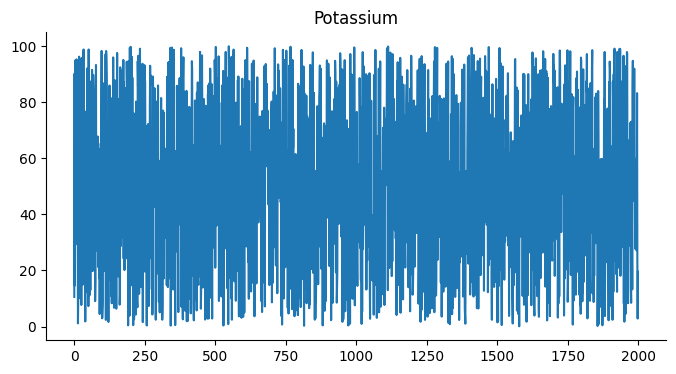

In [ ]:
# @title Potassium

from matplotlib import pyplot as plt
data['Potassium'].plot(kind='line', figsize=(8, 4), title='Potassium')
plt.gca().spines[['top', 'right']].set_visible(False)

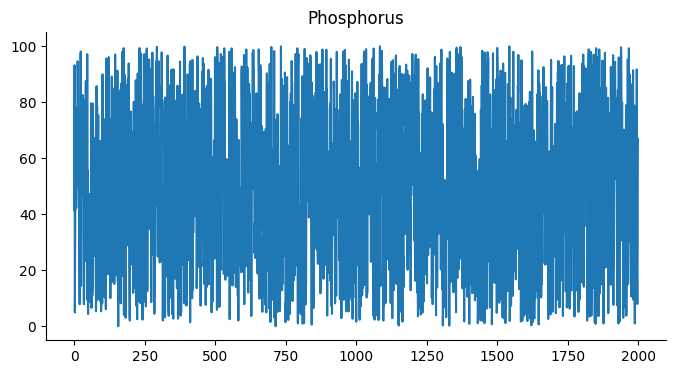

In [ ]:
# @title Phosphorus

from matplotlib import pyplot as plt
data['Phosphorus'].plot(kind='line', figsize=(8, 4), title='Phosphorus')
plt.gca().spines[['top', 'right']].set_visible(False)

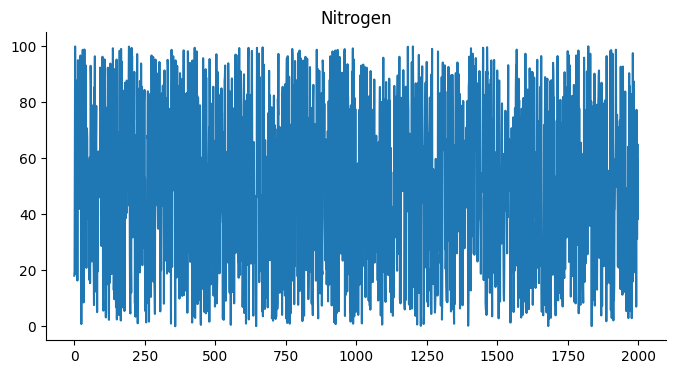

In [ ]:
# @title Nitrogen

from matplotlib import pyplot as plt
data['Nitrogen'].plot(kind='line', figsize=(8, 4), title='Nitrogen')
plt.gca().spines[['top', 'right']].set_visible(False)

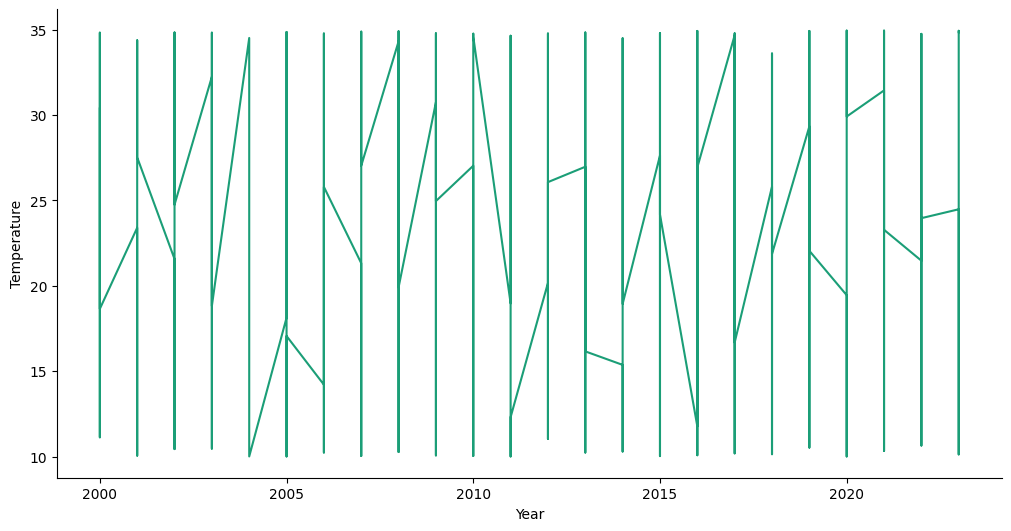

In [ ]:
# @title Year vs Temperature

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Temperature']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Temperature')

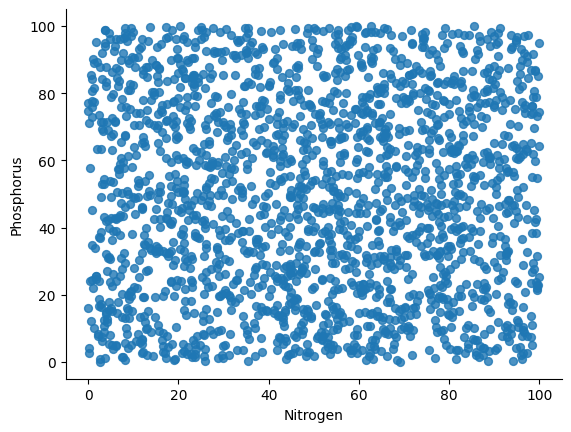

In [ ]:
# @title Nitrogen vs Phosphorus

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Nitrogen', y='Phosphorus', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

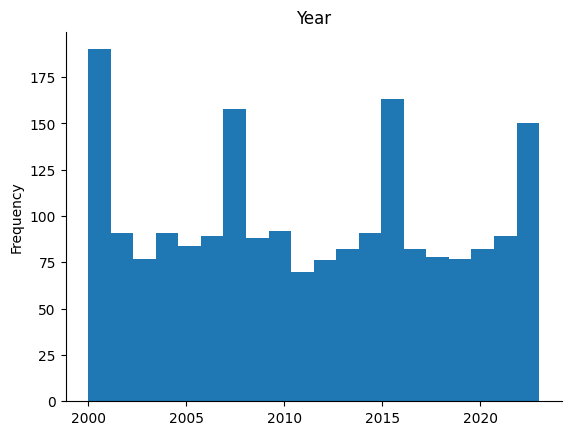

In [ ]:
# @title Year

from matplotlib import pyplot as plt
data['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

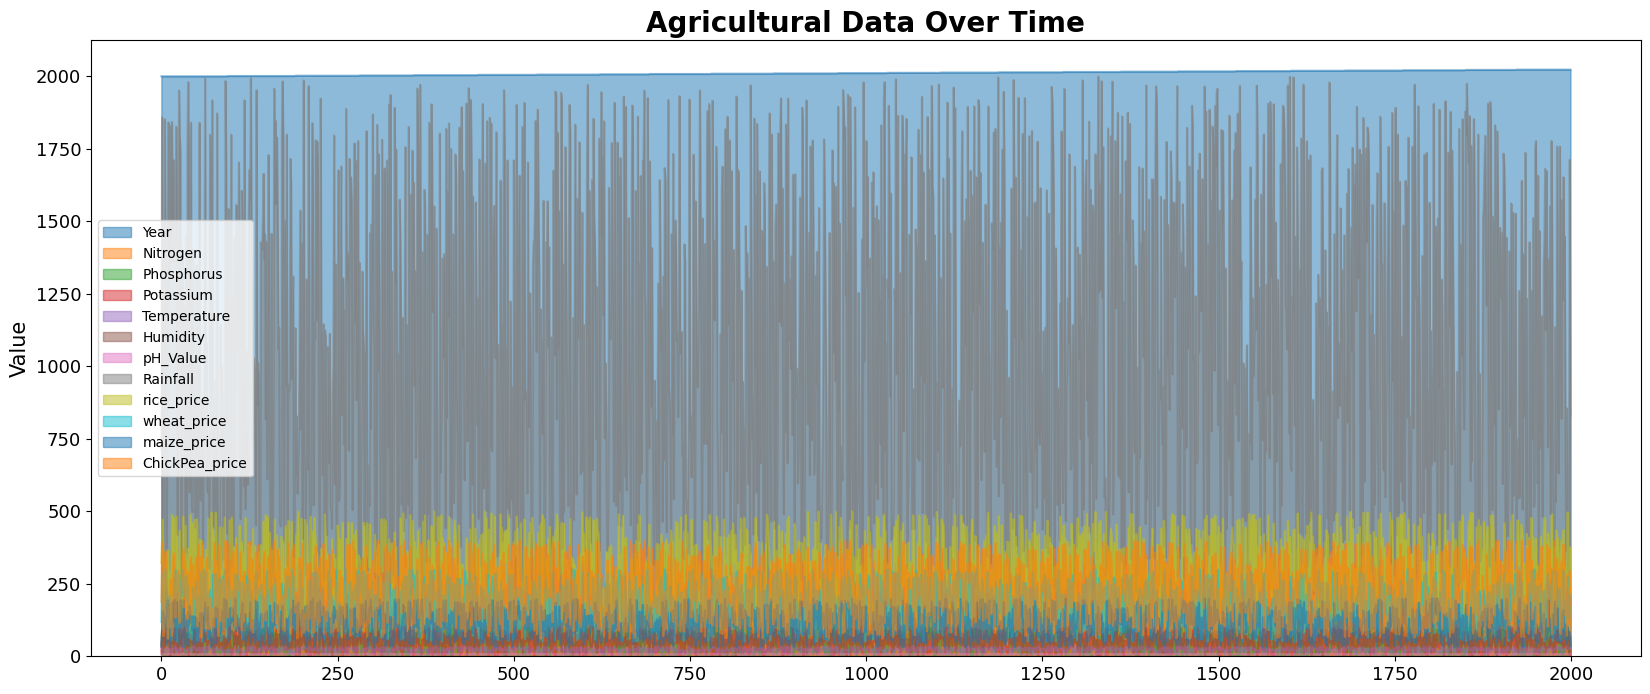

In [ ]:
# Fill missing values with 0
data.fillna(0, inplace=True)

# Plotting
ax = data.plot(kind='area', figsize=(20, 8), stacked=False)
ax.set_title('Agricultural Data Over Time', fontsize=20, fontweight='bold')
ax.set_ylabel('Value', fontsize=15)
ax.set_xlabel('')
ax.tick_params(labelsize=13)
plt.show()

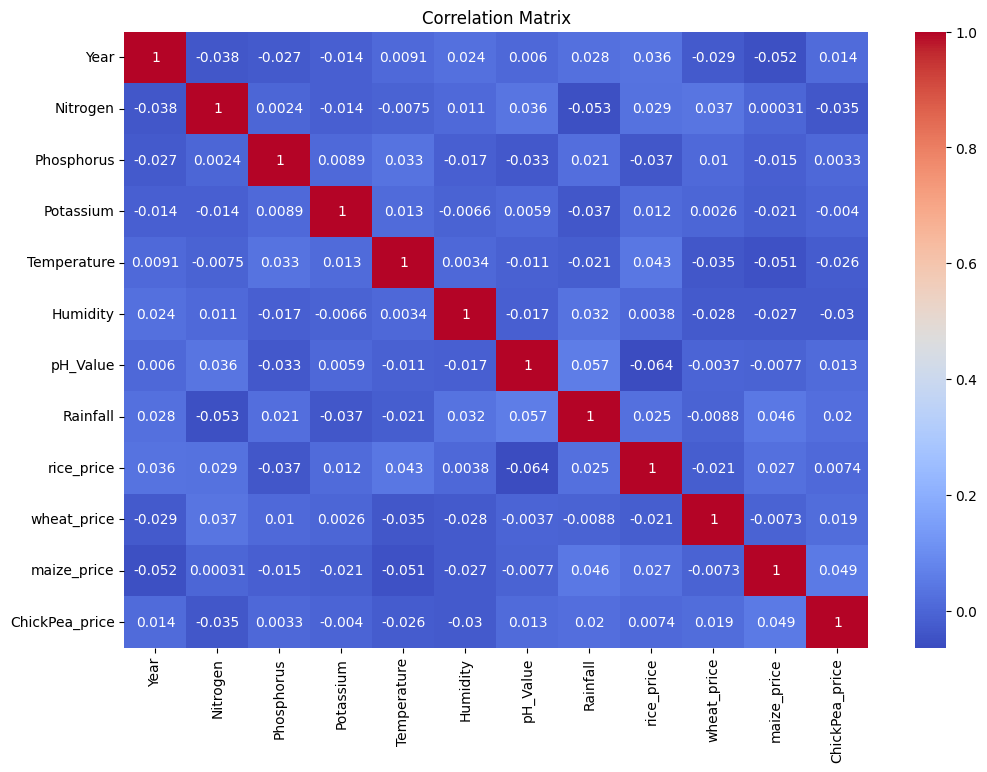

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

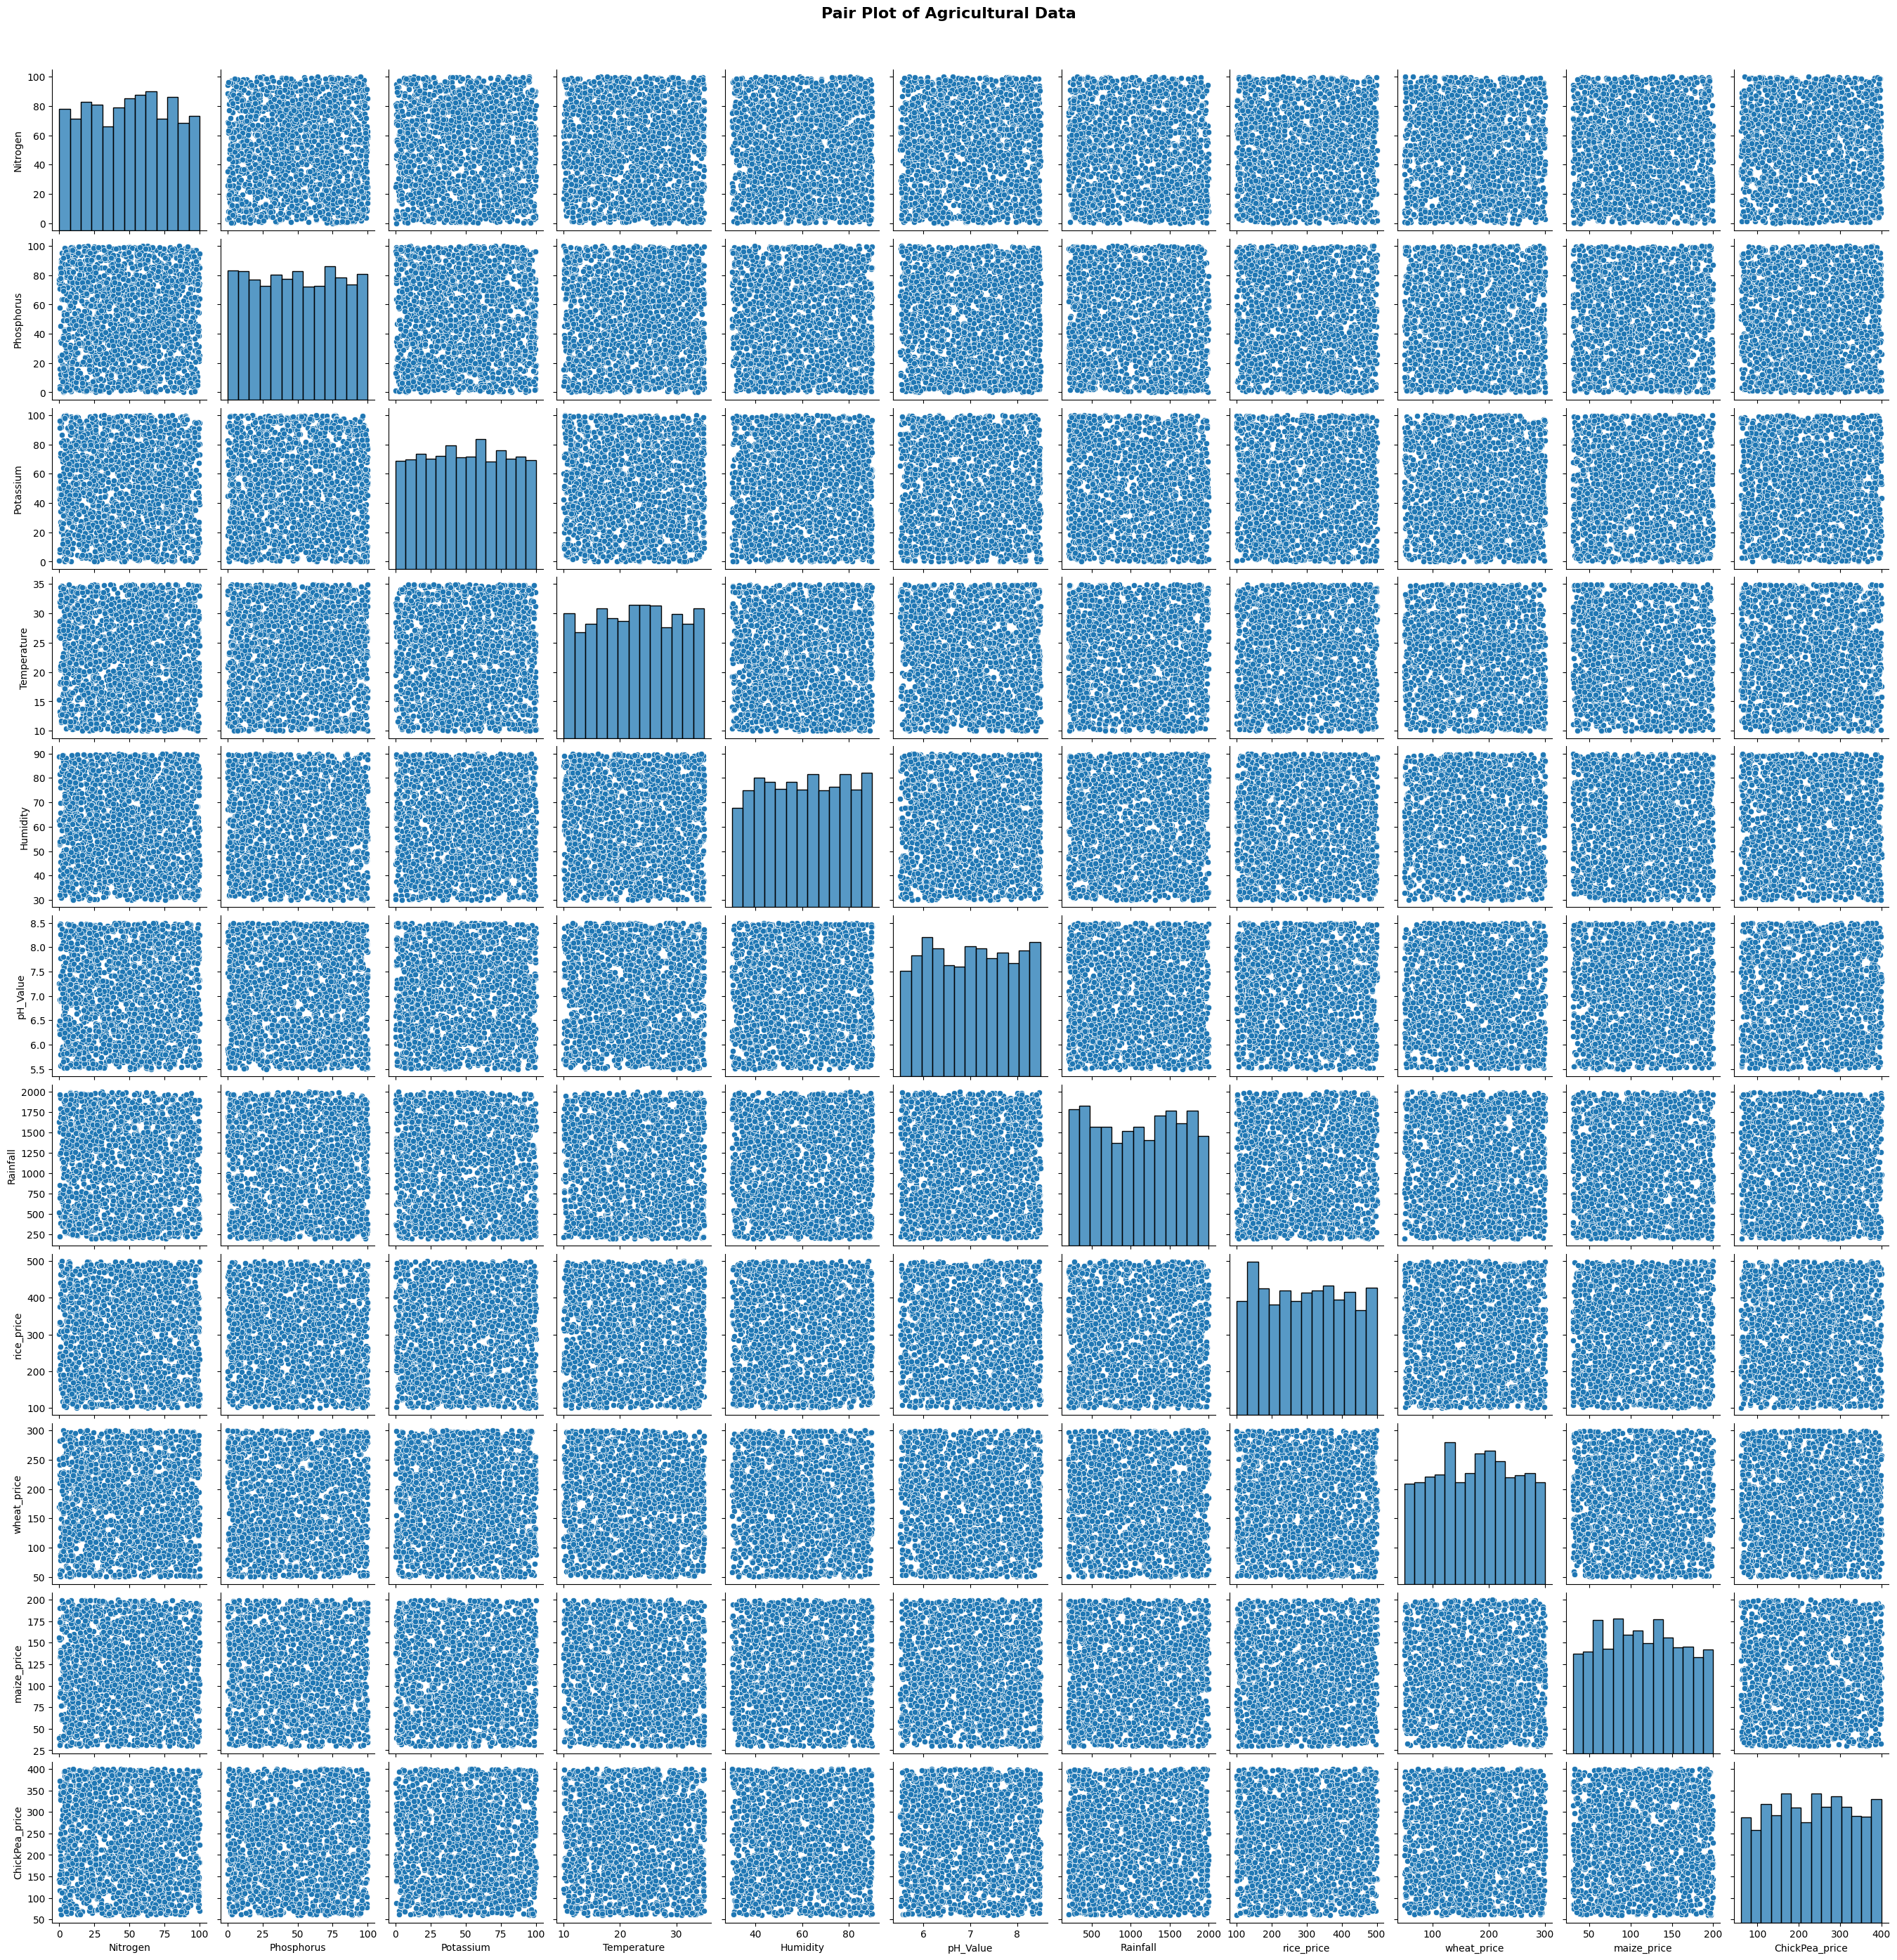

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of the dataset for the pair plot (you can select relevant columns for simplicity)
subset = data[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'rice_price', 'wheat_price', 'maize_price', 'ChickPea_price']]

# Generate pair plot
sns.pairplot(subset)
plt.suptitle('Pair Plot of Agricultural Data', y=1.02, fontsize=16, fontweight='bold')
plt.show()


# Model Training and Evaluation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest models for each crop
rf_model_rice = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_rice.fit(X_train_rice, y_train_rice)

rf_model_wheat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_wheat.fit(X_train_wheat, y_train_wheat)

rf_model_maize = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_maize.fit(X_train_maize, y_train_maize)

rf_model_chickpea = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_chickpea.fit(X_train_chickpea, y_train_chickpea)

# Evaluate Random Forest models for each crop
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

mse_rf_rice, r2_rf_rice = evaluate_model(rf_model_rice, X_test_rice, y_test_rice)
mse_rf_wheat, r2_rf_wheat = evaluate_model(rf_model_wheat, X_test_wheat, y_test_wheat)
mse_rf_maize, r2_rf_maize = evaluate_model(rf_model_maize, X_test_maize, y_test_maize)
mse_rf_chickpea, r2_rf_chickpea = evaluate_model(rf_model_chickpea, X_test_chickpea, y_test_chickpea)

print(f'Rice - Mean Squared Error: {mse_rf_rice}, R-squared Value: {r2_rf_rice}')
print(f'Wheat - Mean Squared Error: {mse_rf_wheat}, R-squared Value: {r2_rf_wheat}')
print(f'Maize - Mean Squared Error: {mse_rf_maize}, R-squared Value: {r2_rf_maize}')
print(f'Chickpea - Mean Squared Error: {mse_rf_chickpea}, R-squared Value: {r2_rf_chickpea}')


Rice - Mean Squared Error: 15059.870322427827, R-squared Value: -0.0521694365934362
Wheat - Mean Squared Error: 5192.85309659825, R-squared Value: -0.06144290671603847
Maize - Mean Squared Error: 2427.635411526125, R-squared Value: -0.013181930192329716
Chickpea - Mean Squared Error: 9594.815746527025, R-squared Value: -0.030827001301080514


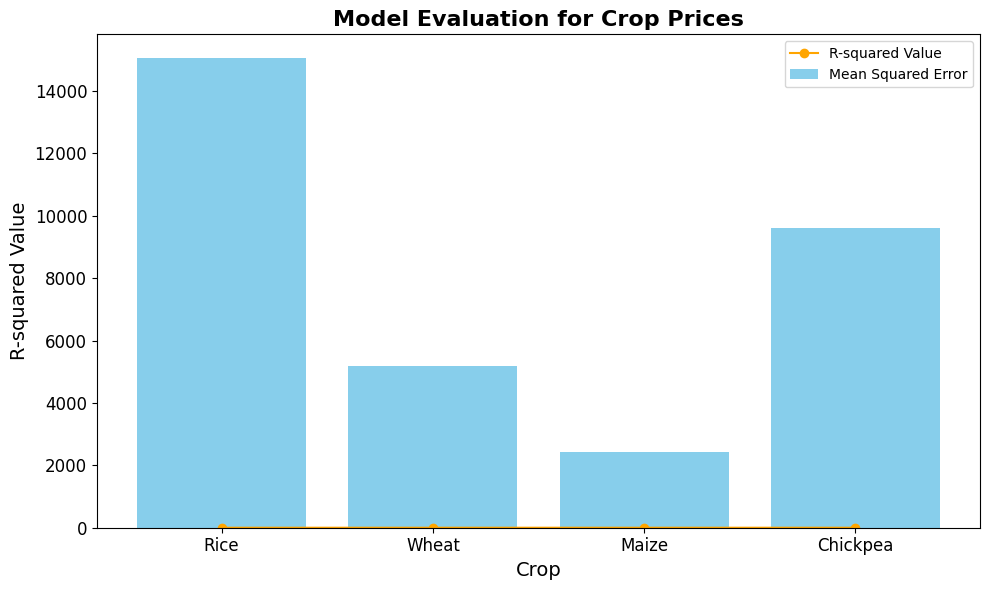

In [ ]:
import matplotlib.pyplot as plt

# Evaluation results
crops = ['Rice', 'Wheat', 'Maize', 'Chickpea']
mse_values = [mse_rf_rice, mse_rf_wheat, mse_rf_maize, mse_rf_chickpea]
r2_values = [r2_rf_rice, r2_rf_wheat, r2_rf_maize, r2_rf_chickpea]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for Mean Squared Error
ax.bar(crops, mse_values, color='skyblue', label='Mean Squared Error')
ax.set_ylabel('Mean Squared Error', fontsize=14)

# Line plot for R-squared Value
ax.plot(crops, r2_values, color='orange', marker='o', label='R-squared Value')
ax.set_ylabel('R-squared Value', fontsize=14)

# Title and labels
ax.set_title('Model Evaluation for Crop Prices', fontsize=16, fontweight='bold')
ax.set_xlabel('Crop', fontsize=14)
ax.tick_params(labelsize=12)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Prediction

In [ ]:
# Example data for today's prediction
todays_data = {
    'Year': [2024],
    'Nitrogen': [50],
    'Phosphorus': [30],
    'Potassium': [20],
    'Temperature': [25],
    'Humidity': [70],
    'pH_Value': [6.5],
    'Rainfall': [200]
}

# Convert to DataFrame
todays_data_df = pd.DataFrame(todays_data)

# Align today's data with the training data for each crop
todays_data_df_rice = todays_data_df.reindex(columns=X.columns, fill_value=0)
todays_data_df_wheat = todays_data_df.reindex(columns=X.columns, fill_value=0)
todays_data_df_maize = todays_data_df.reindex(columns=X.columns, fill_value=0)
todays_data_df_chickpea = todays_data_df.reindex(columns=X.columns, fill_value=0)

# Scale the data for each crop
todays_data_scaled_rice = scaler_rice.transform(todays_data_df_rice)
todays_data_scaled_wheat = scaler_wheat.transform(todays_data_df_wheat)
todays_data_scaled_maize = scaler_maize.transform(todays_data_df_maize)
todays_data_scaled_chickpea = scaler_chickpea.transform(todays_data_df_chickpea)

# Make the predictions for each crop
predicted_prices = {
    'Rice': rf_model_rice.predict(todays_data_scaled_rice)[0],
    'Wheat': rf_model_wheat.predict(todays_data_scaled_wheat)[0],
    'Maize': rf_model_maize.predict(todays_data_scaled_maize)[0],
    'ChickPea': rf_model_chickpea.predict(todays_data_scaled_chickpea)[0]
}

# Print the predicted prices for each crop
print("\nPredicted Prices for Today:")
for crop, price in predicted_prices.items():
    print(f"{crop}: {price}")



Predicted Prices for Today:
Rice: 255.20220000000006
Wheat: 148.65079999999998
Maize: 122.3871
ChickPea: 185.6537


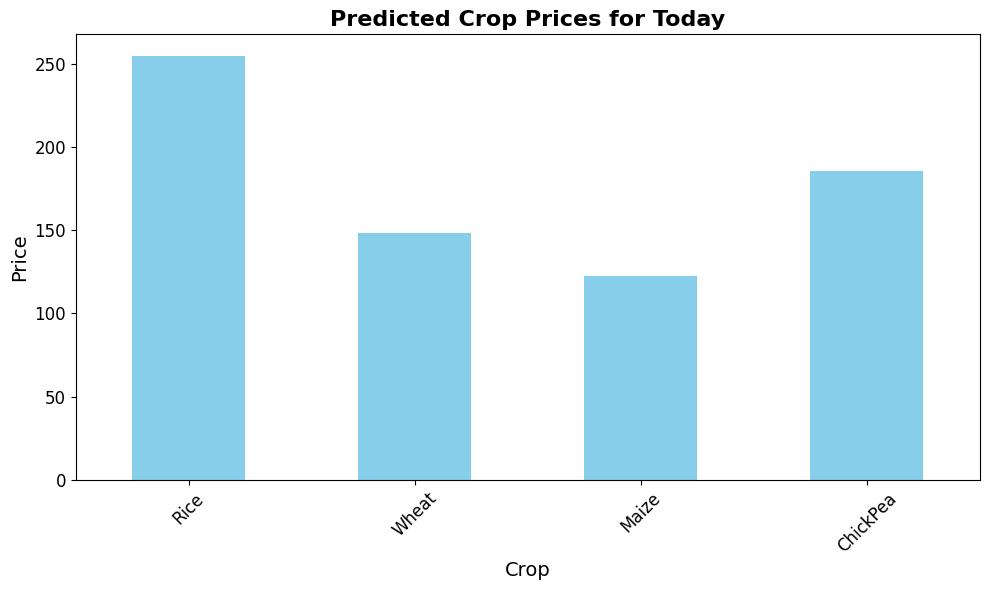

In [ ]:

predicted_prices_df = pd.DataFrame(list(predicted_prices.items()), columns=['Crop', 'Price'])

# Plotting
ax = predicted_prices_df.plot(kind='bar', x='Crop', y='Price', figsize=(10, 6), color='skyblue', legend=None)
ax.set_title('Predicted Crop Prices for Today', fontsize=16, fontweight='bold')
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Crop', fontsize=14)
ax.tick_params(labelsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



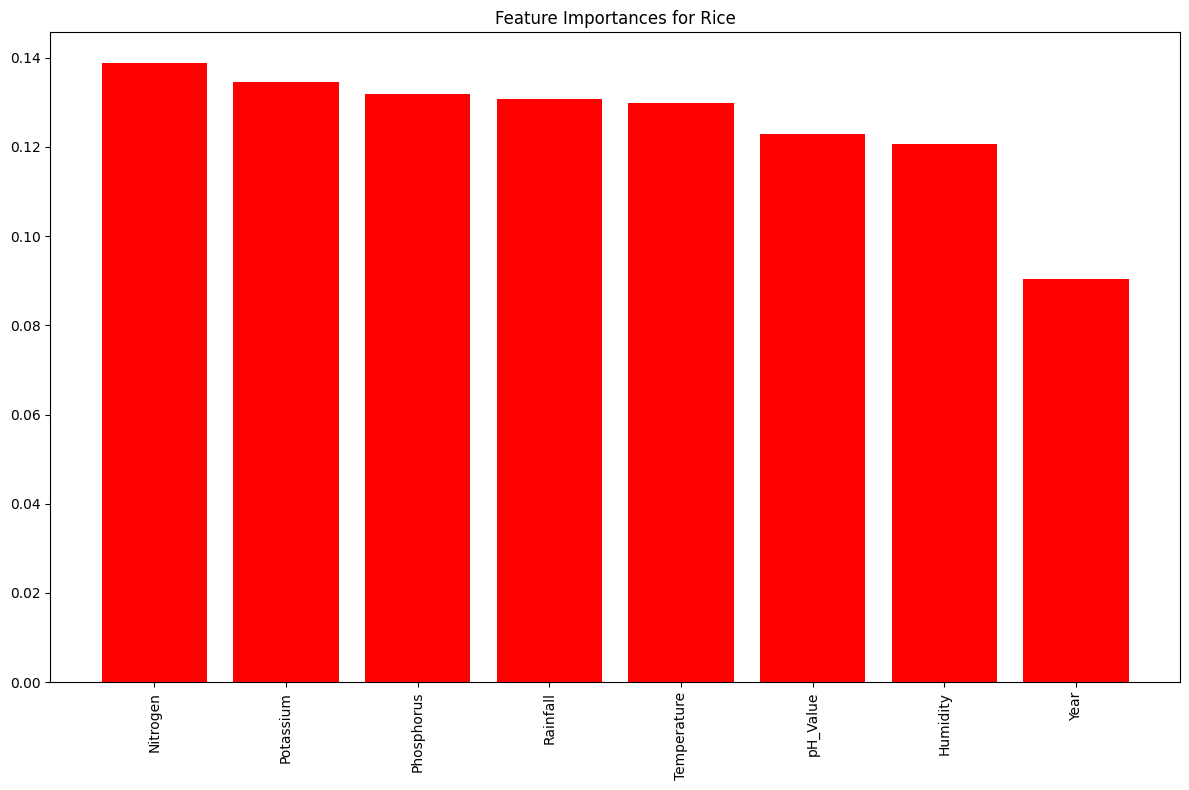

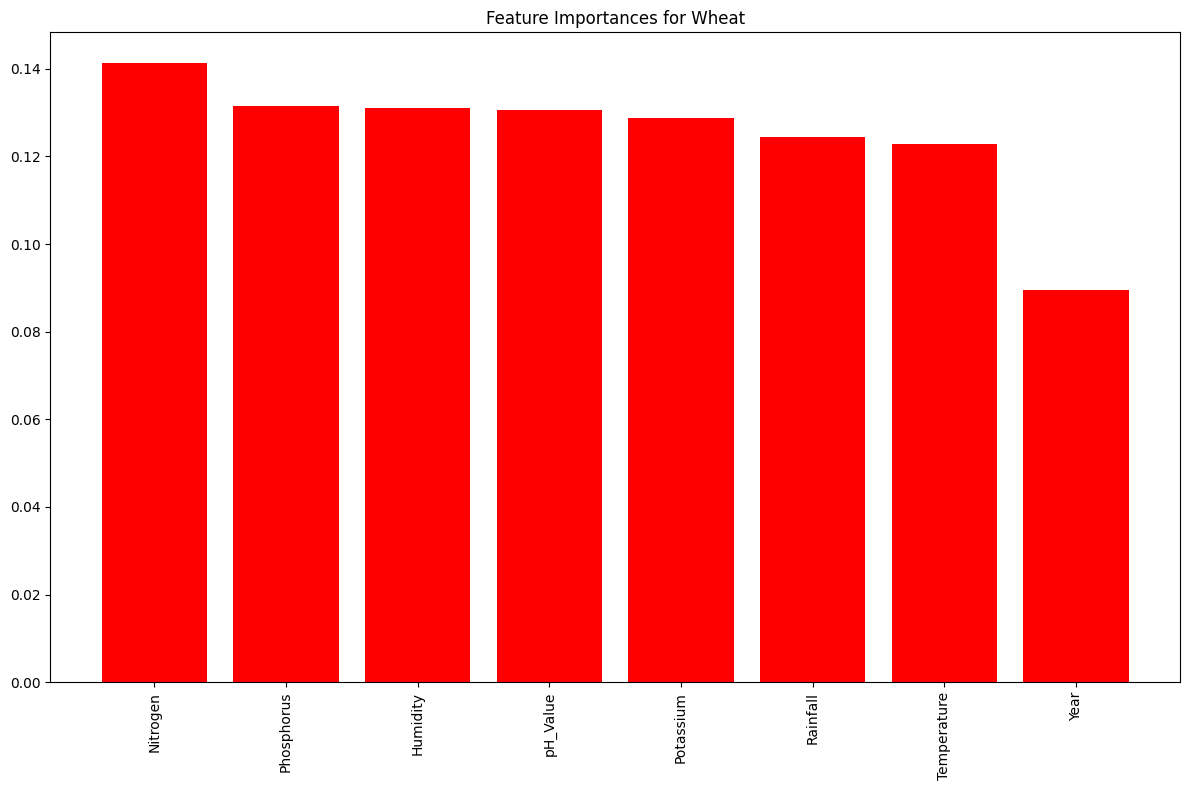

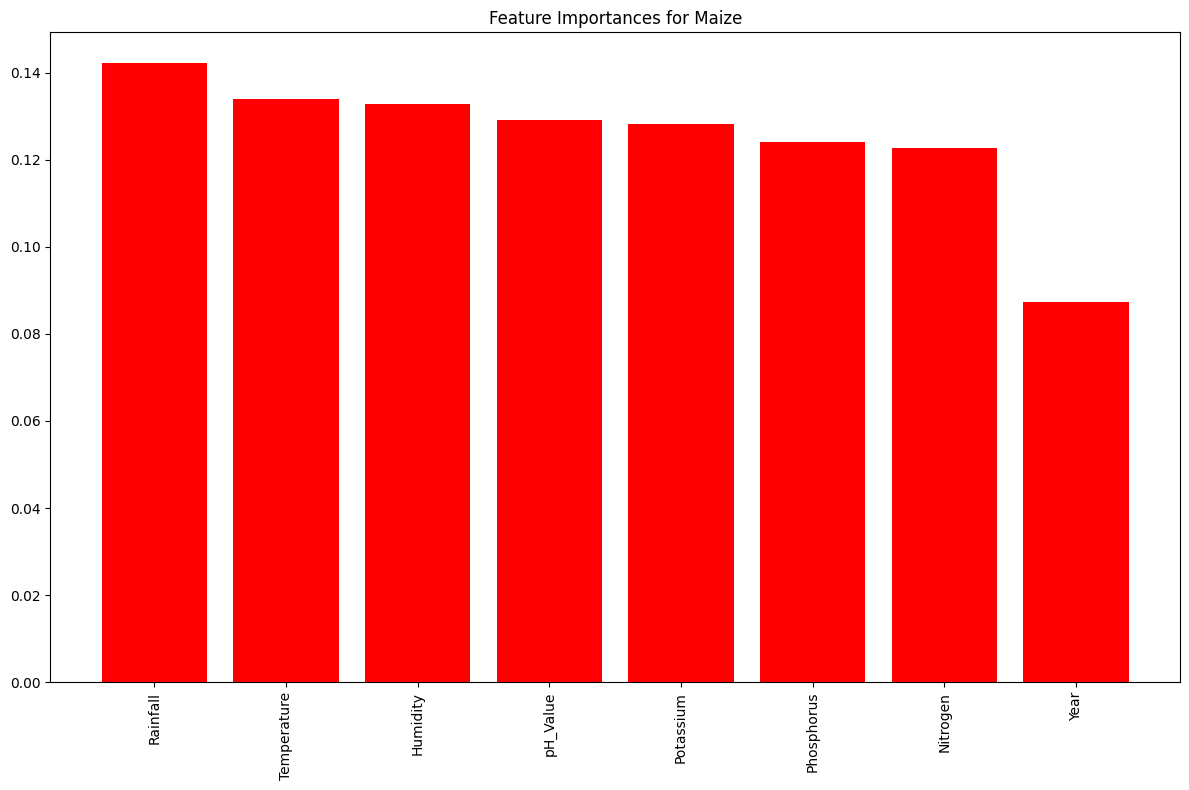

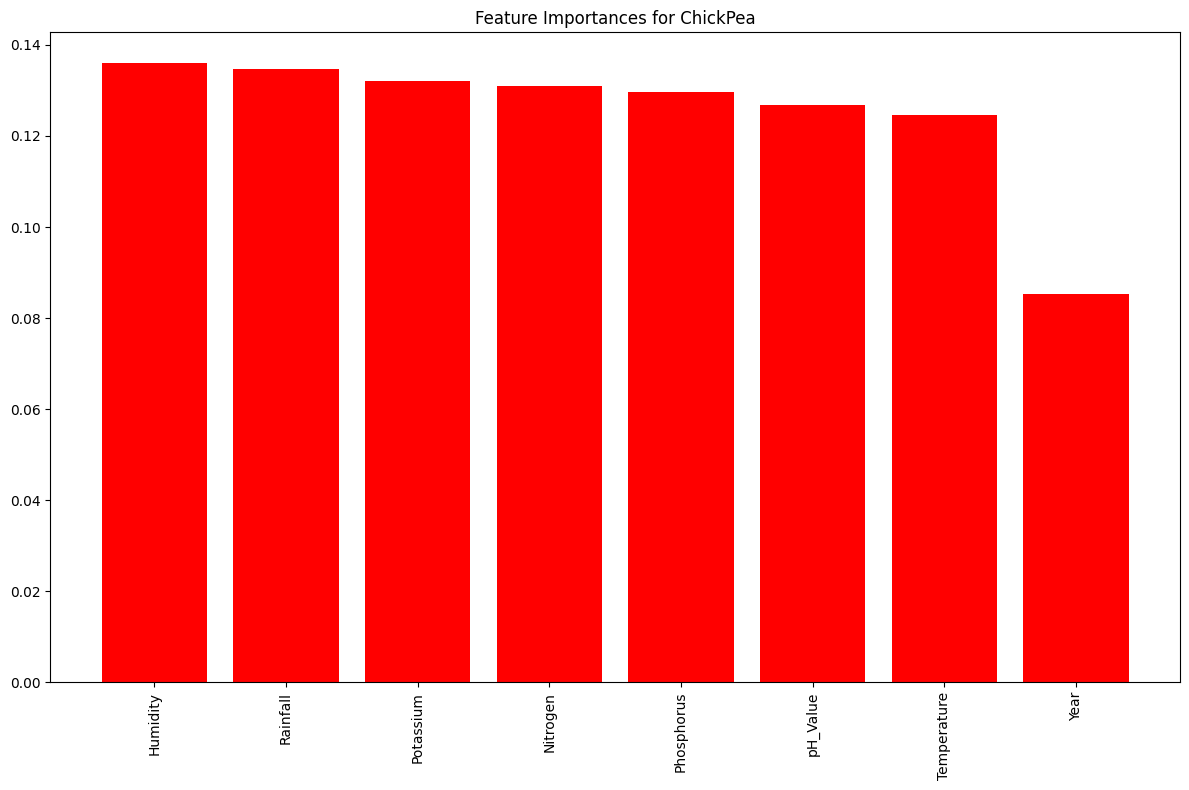

In [ ]:
# Train RandomForest models for each crop
rf_model_rice = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_rice.fit(X_train_rice, y_train_rice)

rf_model_wheat = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_wheat.fit(X_train_wheat, y_train_wheat)

rf_model_maize = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_maize.fit(X_train_maize, y_train_maize)

rf_model_chickpea = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_chickpea.fit(X_train_chickpea, y_train_chickpea)

# Feature Importances
def plot_feature_importances(model, features, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.bar(range(len(indices)), importances[indices], color='r', align='center')
    plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importances(rf_model_rice, X.columns, "Feature Importances for Rice")
plot_feature_importances(rf_model_wheat, X.columns, "Feature Importances for Wheat")
plot_feature_importances(rf_model_maize, X.columns, "Feature Importances for Maize")
plot_feature_importances(rf_model_chickpea, X.columns, "Feature Importances for ChickPea")